In [3]:
import pandas as pd 


In [5]:
covidDataUS = pd.read_csv('../../data/covidDataUS.csv')
covidDataUS = covidDataUS.sort_values("date")
covidDataUS


,date,death,deathIncrease,inIcuCumulative,inIcuCurrently,hospitalizedIncrease,hospitalizedCurrently,hospitalizedCumulative,negative,negativeIncrease,onVentilatorCumulative,onVentilatorCurrently,positive,positiveIncrease,states,totalTestResults,totalTestResultsIncrease
419,2020-01-13,NaN,0,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,1,0,0
418,2020-01-14,NaN,0,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,0.0,0,1,0,0
417,2020-01-15,NaN,0,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,0.0,0,1,0,0
416,2020-01-16,NaN,0,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,0.0,0,1,0,0
415,2020-01-17,NaN,0,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,0.0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2021-03-03,508665.0,2449,45214.0,9359.0,2172,45462.0,770821.0,73857281.0,267001,4260.0,3094.0,28520365.0,66836,56,357888671,1406795
3,2021-03-04,510408.0,1743,45293.0,8970.0,1530,44172.0,772351.0,74035238.0,177957,4267.0,2973.0,28585852.0,65487,56,359479655,1590984
2,2021-03-05,512629.0,2221,45373.0,8634.0,2781,42541.0,775132.0,74307155.0,271917,4275.0,2889.0,28654639.0,68787,56,361224072,1744417
1,2021-03-06,514309.0,1680,45453.0,8409.0,503,41401.0,775635.0,74450990.0,143835,4280.0,2811.0,28714654.0,60015,56,362655064,1430992


In [6]:
covidDataUS_deathInc = covidDataUS[['date','deathIncrease']]


<AxesSubplot:xlabel='date'>

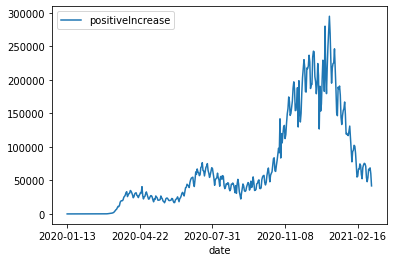

In [7]:
covidDataUS.plot("date","positiveIncrease")

<AxesSubplot:xlabel='date'>

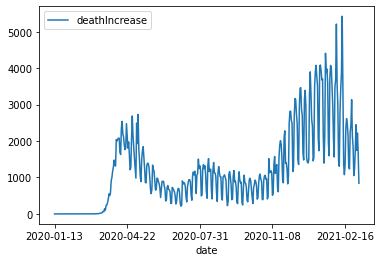

In [8]:
covidDataUS.plot("date","deathIncrease")

In [9]:
covidDataUS = pd.read_csv('/content/drive/MyDrive/PMDSPorject/covidDataUS.csv')
covidDataUS = covidDataUS.sort_values("date")
covidDataUS = covidDataUS[covidDataUS['date'].between('2020-03-07', '2021-03-07')]
covidDataUS

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/PMDSPorject/covidDataUS.csv'

In [12]:
"""deathIncrease Seasonality"""
#covidDataUS_deathInc = covidDataUS[['date','deathIncrease', 'positiveIncrease']]
covidDataUS_deathInc = covidDataUS[['date','deathIncrease']]

from statsmodels.tsa.seasonal import seasonal_decompose
covidDataUS_deathInc.set_index('date', inplace=True)
analysis = covidDataUS_deathInc[['deathIncrease']].copy()
decompose_result_mult = seasonal_decompose(analysis, model="multiplicative", freq = 90 )
trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid
decompose_result_mult.plot();

ValueError: Multiplicative seasonality is not appropriate for zero and negative values

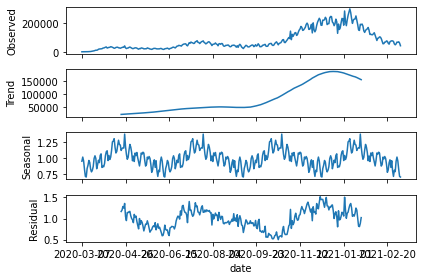

In [9]:
"""positiveIncrease Seasonality"""
covidDataUS_positiveInc = covidDataUS[['date','positiveIncrease']]

from statsmodels.tsa.seasonal import seasonal_decompose
covidDataUS_positiveInc.set_index('date', inplace=True)
analysis = covidDataUS_positiveInc[['positiveIncrease']].copy()
decompose_result_mult = seasonal_decompose(analysis, model="multiplicative", freq = 90 )
trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid
decompose_result_mult.plot();

In [ ]:
#covidDataUS

In [1]:
sentimentsUS = pd.read_csv('../../data/sentimentsUS.csv')
sentimentsUS.plot('day', 'negPercentage')


NameError: name 'pd' is not defined

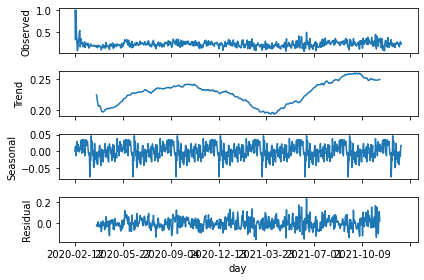

In [20]:
#Seasonality on negPercentage
sentimentsUS_negPercentage = sentimentsUS[['day','negPercentage']].dropna() #8 of them were NaN, so I dropped them


from statsmodels.tsa.seasonal import seasonal_decompose
sentimentsUS_negPercentage.set_index('day', inplace=True)
analysis = sentimentsUS_negPercentage[['negPercentage']].copy()
decompose_result_mult = seasonal_decompose(analysis, model="additive", freq = 90)
trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid
decompose_result_mult.plot();

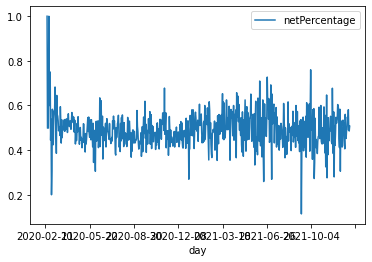

In [21]:
sentimentsUS.plot('day', 'netPercentage')

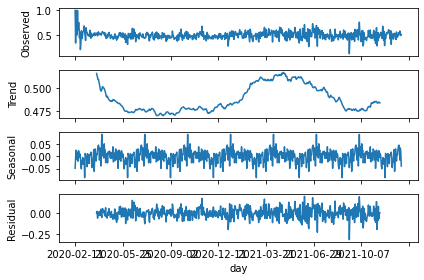

In [22]:
#Seasonality on netPercentage
sentimentsUS_netPercentage = sentimentsUS[['day','netPercentage']].dropna() #8 of them were NaN, so I dropped them

from statsmodels.tsa.seasonal import seasonal_decompose
sentimentsUS_netPercentage.set_index('day', inplace=True)
analysis = sentimentsUS_netPercentage[['netPercentage']].copy()
decompose_result_mult = seasonal_decompose(analysis, model="additive", freq = 90)
trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid
decompose_result_mult.plot();

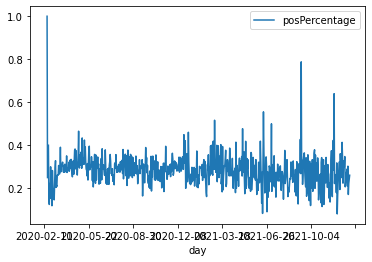

In [23]:
sentimentsUS.plot('day', 'posPercentage')

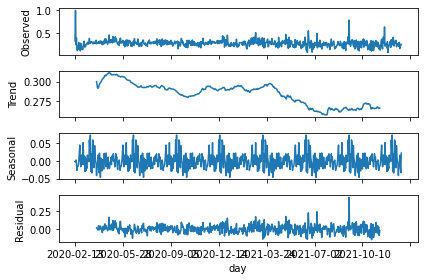

In [24]:
#Seasonality on posPercentage
sentimentsUS_posPercentage = sentimentsUS[['day','posPercentage']].dropna() #8 of them were NaN, so I dropped them

from statsmodels.tsa.seasonal import seasonal_decompose
sentimentsUS_posPercentage.set_index('day', inplace=True)
analysis = sentimentsUS_posPercentage[['posPercentage']].copy()
decompose_result_mult = seasonal_decompose(analysis, model="additive", freq = 90)
trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid
decompose_result_mult.plot();